<a href="https://colab.research.google.com/github/chelynl/hierarchical_clustering/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import Data
from google.colab import files 
import io 

# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy.stats import pearsonr

In [3]:
uploaded = files.upload()

Saving adult.csv to adult.csv


In [16]:
adult = pd.read_csv(io.BytesIO(uploaded['adult.csv']))
adult.head()

,Unnamed: 0,age,workclass,education,educationNumeric,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,incomeLevel,training.obs
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.,1
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.,1
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.,1
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.,1
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.,1


Explore your numeric data

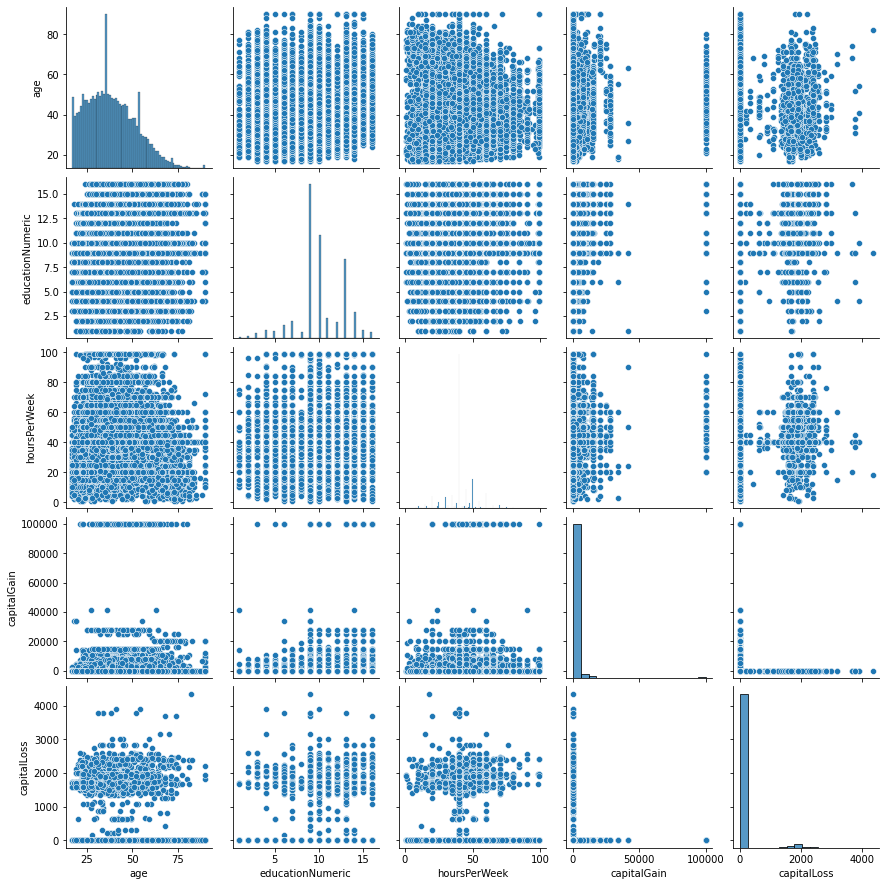

In [17]:
# numeric vars
num_vars = ['age', 'educationNumeric', 'hoursPerWeek', 'capitalGain', 'capitalLoss']

# Basic statistics/visuals: scatter, histograms, correlations of numeric cols
sns.pairplot(adult[num_vars])

We see a spike of 40 hrs/week for average work per week. There are spikes on capital gain and loss at 0 (people who did not report either; OR everyone who reported a capital loss would have 0 capital gains and vice versa)... there's a skew in capital gain/loss attributes (cannot see much of distribution) so we need to change to log transform those vars. Looking at the correlations, there is not a lot of correlations amongst variables.

In [19]:
# Transform numeric data
# Take the log of capital gain and loss in attempt to see more of distributions
adult['capitalGain'] = np.log(adult['capitalGain']+1)
adult['capitalLoss'] = np.log(adult['capitalLoss']+1)

In [15]:
# See histogram of capital gain

# hist(scale(adult$capitalGain))

# # Get get basic statistics/visuals: scatter, histograms, correlations of numeric cols
# par(mfrow=c(1,1))
# pairs.panels(adult[,num.vars], method = 'pearson', density=T, ellipses = T)